In [1]:
# Имортируем библиотеки
import pandas as pd
from collections import Counter
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns



In [2]:
# Загружаем данные, в которых содержится информация различных ресторанах крупных европейских городов
df = pd.read_csv('rest.csv')

In [3]:
# Смотрим на данные
df.head()
# Описание представлено в работе

,Unnamed: 0,Name,City,Cuisine Style,Ranking,Rating,Price Range,Number of Reviews,Reviews,URL_TA,ID_TA
0,0,Martine of Martine's Table,Amsterdam,"['French', 'Dutch', 'European']",1.0,5.0,$$ - $$$,136.0,"[['Just like home', 'A Warm Welcome to Wintry ...",/Restaurant_Review-g188590-d11752080-Reviews-M...,d11752080
1,1,De Silveren Spiegel,Amsterdam,"['Dutch', 'European', 'Vegetarian Friendly', '...",2.0,4.5,$$$$,812.0,"[['Great food and staff', 'just perfect'], ['0...",/Restaurant_Review-g188590-d693419-Reviews-De_...,d693419
2,2,La Rive,Amsterdam,"['Mediterranean', 'French', 'International', '...",3.0,4.5,$$$$,567.0,"[['Satisfaction', 'Delicious old school restau...",/Restaurant_Review-g188590-d696959-Reviews-La_...,d696959
3,3,Vinkeles,Amsterdam,"['French', 'European', 'International', 'Conte...",4.0,5.0,$$$$,564.0,"[['True five star dinner', 'A superb evening o...",/Restaurant_Review-g188590-d1239229-Reviews-Vi...,d1239229
4,4,Librije's Zusje Amsterdam,Amsterdam,"['Dutch', 'European', 'International', 'Vegeta...",5.0,4.5,$$$$,316.0,"[['Best meal.... EVER', 'super food experience...",/Restaurant_Review-g188590-d6864170-Reviews-Li...,d6864170


In [4]:
# Смотрим общую информацию
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125527 entries, 0 to 125526
Data columns (total 11 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Unnamed: 0         125527 non-null  int64  
 1   Name               125527 non-null  object 
 2   City               125527 non-null  object 
 3   Cuisine Style      94176 non-null   object 
 4   Ranking            115876 non-null  float64
 5   Rating             115897 non-null  float64
 6   Price Range        77672 non-null   object 
 7   Number of Reviews  108183 non-null  float64
 8   Reviews            115911 non-null  object 
 9   URL_TA             125527 non-null  object 
 10  ID_TA              125527 non-null  object 
dtypes: float64(3), int64(1), object(7)
memory usage: 10.5+ MB


In [5]:
# Перезапишем данные удаляя информацию, неактуальную для исследования
df = df[['Name','City','Cuisine Style','Rating','Price Range','Number of Reviews']]
df

,Name,City,Cuisine Style,Rating,Price Range,Number of Reviews
0,Martine of Martine's Table,Amsterdam,"['French', 'Dutch', 'European']",5.0,$$ - $$$,136.0
1,De Silveren Spiegel,Amsterdam,"['Dutch', 'European', 'Vegetarian Friendly', '...",4.5,$$$$,812.0
2,La Rive,Amsterdam,"['Mediterranean', 'French', 'International', '...",4.5,$$$$,567.0
3,Vinkeles,Amsterdam,"['French', 'European', 'International', 'Conte...",5.0,$$$$,564.0
4,Librije's Zusje Amsterdam,Amsterdam,"['Dutch', 'European', 'International', 'Vegeta...",4.5,$$$$,316.0
...,...,...,...,...,...,...
125522,Konrad Kaffee- & Cocktailbar,Zurich,NaN,NaN,NaN,NaN
125523,Blueberry American Bakery,Zurich,['Cafe'],NaN,NaN,NaN
125524,Restaurant Bahnhof,Zurich,NaN,NaN,NaN,NaN
125525,Yoyo Pizza,Zurich,['Fast Food'],NaN,NaN,NaN


In [6]:
# Все названия ресторанов приведем к одному регистру, для избегания повторений
df['Name'] = df['Name'].str.lower()
# Проверим данные на дубликаты
print(df.duplicated().sum())
df[(df.duplicated(keep=False) == 1)].sort_values(by=['Name']).head(15)
# Имеются повторяющиеся строки, 
# также ресторан может быть сетевым и тогда один и то же ресторан может быть в нескольких городах


605


,Name,City,Cuisine Style,Rating,Price Range,Number of Reviews
76764,100 montaditos,Madrid,NaN,NaN,NaN,NaN
76766,100 montaditos,Madrid,NaN,NaN,NaN,NaN
68506,20 a la cata,Madrid,"['Cafe', 'Spanish', 'Delicatessen']",5.0,$$ - $$$,18.0
68590,20 a la cata,Madrid,"['Cafe', 'Spanish', 'Delicatessen']",5.0,$$ - $$$,18.0
68559,al-mounia,Madrid,"['Moroccan', 'Vegetarian Friendly', 'Vegan Opt...",4.0,$$ - $$$,341.0
68588,al-mounia,Madrid,"['Moroccan', 'Vegetarian Friendly', 'Vegan Opt...",4.0,$$ - $$$,341.0
76677,aliso aire,Madrid,"['Spanish', 'Australian']",NaN,$$ - $$$,NaN
76683,aliso aire,Madrid,"['Spanish', 'Australian']",NaN,$$ - $$$,NaN
73496,alpunto sol,Madrid,NaN,4.0,NaN,5.0
73657,alpunto sol,Madrid,NaN,4.0,NaN,5.0


In [7]:
# Удалим дубликаты
df = df.drop_duplicates()
df.duplicated().sum()


0

In [8]:
# Посмотрим на сетевые рестораны
# Для этого смотрим повторения по названиям. Для этого используем группировку
df_groupby_name = df.groupby('Name')['City'].apply(lambda x: x.unique()).reset_index()
df_groupby_name.head()

,Name,City
0,!bebop daslokal,[Vienna]
1,"""52"" bistro restauarnt and bar",[Budapest]
2,"""above"" roof top restaurant",[Athens]
3,"""bistro antidotum""",[Krakow]
4,"""black & white""",[Berlin]


In [9]:
# Сколько повторений?
df_popular = df_groupby_name[df_groupby_name.City.apply(lambda x: len(x) > 1)]
df_popular

,Name,City
101,100 montaditos,"[Barcelona, Lisbon, Madrid, Milan, Rome]"
333,231 east street,"[Lyon, Paris]"
442,365. cafe,"[Barcelona, Bratislava]"
484,4 saisons,"[Geneva, Luxembourg, Paris]"
554,500 restaurant,"[London, Prague]"
...,...,...
110496,zucca,"[Berlin, Lyon]"
110577,zum franziskaner,"[Munich, Stockholm]"
110701,zuppa,"[Madrid, Vienna]"
110773,zurich,"[Madrid, Zurich]"


In [10]:
# А есть ли ресторан, который представлен во всех городах?
df_groupby_name[df_groupby_name.City.apply(lambda x: len(x) == 31)]
# Такого нет

,Name,City


In [11]:
# Что самое популярное?
df_popular['count'] = df_groupby_name.City.apply(lambda x: len(x))
df_popular.sort_values(by='count',ascending=False).head(20)

# В рамках выборки не слишком большое число повторений
# Самые распростаненные - сети фастфуда

<ipython-input-11-328bdd11cb5b>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_popular['count'] = df_groupby_name.City.apply(lambda x: len(x))


,Name,City,count
64138,mcdonald's,"[Amsterdam, Barcelona, Berlin, Bratislava, Bru...",30
14397,burger king,"[Amsterdam, Barcelona, Berlin, Brussels, Budap...",24
94809,subway,"[Barcelona, Berlin, Bratislava, Budapest, Dubl...",21
46591,kfc,"[Amsterdam, Barcelona, Berlin, Budapest, Dubli...",20
28147,domino's pizza,"[Amsterdam, Athens, Barcelona, Brussels, Copen...",19
76714,pizza hut,"[Athens, Berlin, Brussels, Dublin, Edinburgh, ...",16
94035,starbucks,"[Amsterdam, Barcelona, Bratislava, Brussels, D...",13
105715,vapiano,"[Amsterdam, Barcelona, Berlin, Budapest, Genev...",12
95506,sushi shop,"[Barcelona, Brussels, Geneva, Lisbon, London, ...",11
19295,carpe diem,"[Barcelona, Berlin, Brussels, London, Luxembou...",11


Text(0.5, 1.0, 'Распределение ресторанов по частоте повторений в городах')

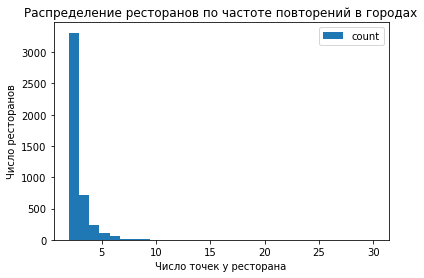

In [12]:
df_popular_plot = df_popular.plot(kind='hist', bins = 30)
df_popular_plot.set_xlabel('Число точек у ресторана')
df_popular_plot.set_ylabel('Число ресторанов')
df_popular_plot.set_title('Распределение ресторанов по частоте повторений в городах')
#Рестораны с самым максимальным числом точек имеют наименьшую частоты, т.е. встречаются реже всего

In [13]:
# Большая часть ресторанов с повторением имеет по 2 точки. 
df_groupby_name[df_groupby_name.City.apply(lambda x: len(x) == 2)]

,Name,City
333,231 east street,"[Lyon, Paris]"
442,365. cafe,"[Barcelona, Bratislava]"
554,500 restaurant,"[London, Prague]"
635,77 sushi,"[Krakow, Warsaw]"
690,900,"[Madrid, Rome]"
...,...,...
110496,zucca,"[Berlin, Lyon]"
110577,zum franziskaner,"[Munich, Stockholm]"
110701,zuppa,"[Madrid, Vienna]"
110773,zurich,"[Madrid, Zurich]"


In [14]:
# Посмотрим на список городов
print(df['City'].unique())
df_city = df.groupby('City')['City'].count()
df_city.sort_values(ascending=False)

['Amsterdam' 'Athens' 'Barcelona' 'Berlin' 'Bratislava' 'Brussels'
 'Budapest' 'Copenhagen' 'Dublin' 'Edinburgh' 'Geneva' 'Hamburg'
 'Helsinki' 'Krakow' 'Lisbon' 'Ljubljana' 'London' 'Luxembourg' 'Lyon'
 'Madrid' 'Milan' 'Munich' 'Oporto' 'Oslo' 'Paris' 'Prague' 'Rome'
 'Stockholm' 'Vienna' 'Warsaw' 'Zurich']


City
London        18014
Paris         14850
Madrid         9362
Barcelona      8389
Berlin         7069
Milan          6678
Rome           5949
Prague         4804
Lisbon         3986
Vienna         3719
Amsterdam      3431
Brussels       3203
Hamburg        3122
Munich         2987
Lyon           2922
Stockholm      2697
Budapest       2603
Warsaw         2343
Copenhagen     2103
Dublin         2082
Athens         1926
Edinburgh      1864
Zurich         1667
Oporto         1577
Geneva         1569
Krakow         1353
Helsinki       1228
Oslo           1200
Bratislava     1067
Luxembourg      657
Ljubljana       501
Name: City, dtype: int64

Text(0.5, 1.0, 'Распределение количества ресторанов в городе')

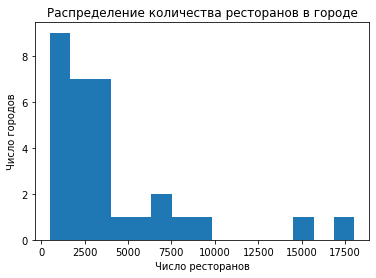

In [15]:
df_score = df_city.plot(kind='hist', bins = 15)
df_score.set_xlabel('Число ресторанов')
df_score.set_ylabel('Число городов')
df_score.set_title('Распределение количества ресторанов в городе')

In [16]:
# Информация о ценовом критерии представлена в виде специальных знаков
print(df['Price Range'].unique())
# Для дальнейшей работы заменим эти условные обозначения числовыми - 1, 2.5, и 4 соответственно
df.replace('$', 1, inplace=True)
df.replace('$$ - $$$', 2.5, inplace=True)
df.replace('$$$$', 4, inplace=True)
df.head(15)


['$$ - $$$' '$$$$' '$' nan]


C:\PYDA\lib\site-packages\pandas\core\frame.py:4166: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().replace(


,Name,City,Cuisine Style,Rating,Price Range,Number of Reviews
0,martine of martine's table,Amsterdam,"['French', 'Dutch', 'European']",5.0,2.5,136.0
1,de silveren spiegel,Amsterdam,"['Dutch', 'European', 'Vegetarian Friendly', '...",4.5,4.0,812.0
2,la rive,Amsterdam,"['Mediterranean', 'French', 'International', '...",4.5,4.0,567.0
3,vinkeles,Amsterdam,"['French', 'European', 'International', 'Conte...",5.0,4.0,564.0
4,librije's zusje amsterdam,Amsterdam,"['Dutch', 'European', 'International', 'Vegeta...",4.5,4.0,316.0
5,ciel bleu restaurant,Amsterdam,"['Contemporary', 'International', 'Vegetarian ...",4.5,4.0,745.0
6,zaza's,Amsterdam,"['French', 'International', 'Mediterranean', '...",4.5,2.5,1455.0
7,blue pepper restaurant and candlelight cruises,Amsterdam,"['Asian', 'Indonesian', 'Vegetarian Friendly',...",4.5,4.0,675.0
8,teppanyaki restaurant sazanka,Amsterdam,"['Japanese', 'Asian', 'Vegetarian Friendly', '...",4.5,4.0,923.0
9,rob wigboldus vishandel,Amsterdam,"['Dutch', 'Seafood', 'Fast Food']",4.5,1.0,450.0


In [17]:
# Перейдем к обработке пропусков
 
# По столбцу с информацией о кухне имеются пропуски, однако нет возможности заполнить их 
# достоверным или усредненным значением
# Заполняем пропуски значением "неизвестно"

df['Cuisine Style'] = df['Cuisine Style'].fillna('unknown')

# Пропуски в столбцах с числовой информацией заполним средним значением по городу

df['Price Range'] = df['Price Range'].fillna(df.groupby('City')['Price Range'].transform('mean'))
df['Number of Reviews'] = df['Number of Reviews'].fillna(df.groupby('City')['Number of Reviews'].transform('mean'))

# Строки с пропущенным результативным значением удаляем из выборки, что бы избежать ложных зависимостей
df = df.dropna()
df.info()

# Датасет по числу строк сократился на 7,5% от первоначального. В рамках работы потери считаем не критичными.


<ipython-input-17-aa7a2e3e6219>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Cuisine Style'] = df['Cuisine Style'].fillna('unknown')
<ipython-input-17-aa7a2e3e6219>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Price Range'] = df['Price Range'].fillna(df.groupby('City')['Price Range'].transform('mean'))
<ipython-input-17-aa7a2e3e6219>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See th

<class 'pandas.core.frame.DataFrame'>
Int64Index: 115575 entries, 0 to 125454
Data columns (total 6 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Name               115575 non-null  object 
 1   City               115575 non-null  object 
 2   Cuisine Style      115575 non-null  object 
 3   Rating             115575 non-null  float64
 4   Price Range        115575 non-null  float64
 5   Number of Reviews  115575 non-null  float64
dtypes: float64(3), object(3)
memory usage: 6.2+ MB


In [18]:

# Для того, что бы иметь общее представление о распределении видов кухонь 
# собирем все значения в один список и посмотрим на частоту 

# Список кухонь в столбце представлен строкой, поэтому необходимо сначала разбить ее на список. 
# Затем совместить все в один список и использовать счетчик
list_ = df['Cuisine Style'].tolist()
flat_list = []

for str_ in list_:
    sublist = str_.replace("'", '').replace("[", '').replace("]", '').replace(",", '').split()
    for i in sublist:
        flat_list.append(i)


most_common = Counter(flat_list).most_common(10)
most_common


[('European', 34716),
 ('Vegetarian', 32274),
 ('Friendly', 32274),
 ('unknown', 26691),
 ('Options', 25062),
 ('Mediterranean', 17927),
 ('Italian', 17177),
 ('Vegan', 12968),
 ('Gluten', 12094),
 ('Free', 12094)]

In [19]:
df['Cuisine Style'] = df['Cuisine Style'].tolist()
# Для удобства переводим в список

In [20]:
print(len(flat_list))
# В данных имеется большое разнообразие возможные вариантов кухонь. Для удобства работы проведем категоризацию данных. 
# Добавим в датасет 6 бинарных столбцов с различными категориями, 
# где значение 1 означает, что ресторан предлагает такую кухню и 0 - такая опция отсутствует
# Категории выбраны на основе 30 самых популярных опций, так как они встерчаются около 3000 раз или более
Counter(flat_list).most_common(100)


390576


[('European', 34716),
 ('Vegetarian', 32274),
 ('Friendly', 32274),
 ('unknown', 26691),
 ('Options', 25062),
 ('Mediterranean', 17927),
 ('Italian', 17177),
 ('Vegan', 12968),
 ('Gluten', 12094),
 ('Free', 12094),
 ('Bar', 11654),
 ('French', 9116),
 ('Asian', 8794),
 ('Pizza', 8053),
 ('Pub', 7794),
 ('Spanish', 7779),
 ('Cafe', 6822),
 ('Food', 5545),
 ('American', 5265),
 ('Fast', 4766),
 ('British', 4702),
 ('International', 4565),
 ('Central', 4524),
 ('Japanese', 4301),
 ('Seafood', 4291),
 ('Eastern', 3683),
 ('Chinese', 3489),
 ('Sushi', 3337),
 ('Portuguese', 3178),
 ('Indian', 2914),
 ('Middle', 2236),
 ('Wine', 2175),
 ('Thai', 2160),
 ('German', 1968),
 ('Greek', 1795),
 ('Fusion', 1770),
 ('Healthy', 1762),
 ('Czech', 1687),
 ('Halal', 1655),
 ('Steakhouse', 1641),
 ('Barbecue', 1607),
 ('Soups', 1581),
 ('Contemporary', 1552),
 ('Vietnamese', 1488),
 ('Grill', 1484),
 ('Gastropub', 1417),
 ('Mexican', 1303),
 ('Turkish', 1295),
 ('Austrian', 1118),
 ('South', 1114),
 ('D

In [21]:
df.head()

,Name,City,Cuisine Style,Rating,Price Range,Number of Reviews
0,martine of martine's table,Amsterdam,"['French', 'Dutch', 'European']",5.0,2.5,136.0
1,de silveren spiegel,Amsterdam,"['Dutch', 'European', 'Vegetarian Friendly', '...",4.5,4.0,812.0
2,la rive,Amsterdam,"['Mediterranean', 'French', 'International', '...",4.5,4.0,567.0
3,vinkeles,Amsterdam,"['French', 'European', 'International', 'Conte...",5.0,4.0,564.0
4,librije's zusje amsterdam,Amsterdam,"['Dutch', 'European', 'International', 'Vegeta...",4.5,4.0,316.0


In [22]:
# Функции для категоризации данных в соответствии с гипотезами, сформулированными в работе

def cus1(row):
    cus = row['Cuisine Style']
    if 'European' in cus:
        return 1
    else:
        return 0
    
def cus2(row):
    cus = row['Cuisine Style']
    if 'Vegetarian' in cus:
        return 1
    elif 'Vegan' in cus:
        return 1
    elif 'Gluten' in cus:
        return 1
    elif 'Healthy' in cus:
        return 1
    else:
        return 0
    
def cus3(row):
    cus = row['Cuisine Style']
    if 'Bar' in cus:
        return 1
    elif 'Pub' in cus:
        return 1
    elif 'Wine' in cus:
        return 1
    else:
        return 0
    
def cus4(row):
    cus = row['Cuisine Style']
    if 'Fast Food' in cus:
        return 1
    else:
        return 0
    
def cus5(row):
    cus = row['Cuisine Style']
    if 'unknown' in cus:
        return 1
    else:
        return 0

    


In [23]:
# Применяем фуннкции 

df['european'] = df.apply(cus1, axis = 1)
df['healthy'] = df.apply(cus2, axis = 1)
df['alcho'] = df.apply(cus3, axis = 1)
df['fast_food'] = df.apply(cus4, axis = 1)
df['unknow'] = df.apply(cus5, axis = 1)
df

,Name,City,Cuisine Style,Rating,Price Range,Number of Reviews,european,healthy,alcho,fast_food,unknow
0,martine of martine's table,Amsterdam,"['French', 'Dutch', 'European']",5.0,2.500000,136.000000,1,0,0,0,0
1,de silveren spiegel,Amsterdam,"['Dutch', 'European', 'Vegetarian Friendly', '...",4.5,4.000000,812.000000,1,1,0,0,0
2,la rive,Amsterdam,"['Mediterranean', 'French', 'International', '...",4.5,4.000000,567.000000,1,1,0,0,0
3,vinkeles,Amsterdam,"['French', 'European', 'International', 'Conte...",5.0,4.000000,564.000000,1,1,0,0,0
4,librije's zusje amsterdam,Amsterdam,"['Dutch', 'European', 'International', 'Vegeta...",4.5,4.000000,316.000000,1,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
125450,not guilty bellevue,Zurich,"['International', 'European', 'Contemporary', ...",1.0,2.500000,75.919679,1,1,0,0,0
125451,ly's take away,Zurich,unknown,1.0,2.495986,2.000000,0,0,0,0,1
125452,restaurant gasthof hirschen,Zurich,"['German', 'Swiss', 'European', 'Central Europ...",1.0,2.495986,2.000000,1,0,0,0,0
125453,hukka restaurant & hookah lounge,Zurich,"['German', 'Belgian', 'Mediterranean', 'Europe...",1.0,4.000000,75.919679,1,0,0,0,0


In [24]:
# Выводим таблицу корреляции
df.corr()

,Rating,Price Range,Number of Reviews,european,healthy,alcho,fast_food,unknow
Rating,1.000000,-0.020883,0.031659,0.046920,0.140120,0.012636,-0.009143,-0.042152
Price Range,-0.020883,1.000000,0.153725,0.171600,0.122304,0.016253,-0.257612,0.002391
Number of Reviews,0.031659,0.153725,1.000000,0.200090,0.349866,0.064801,-0.000175,-0.174328
european,0.046920,0.171600,0.200090,1.000000,0.273290,0.115783,-0.063968,-0.321113
healthy,0.140120,0.122304,0.349866,0.273290,1.000000,0.052894,0.048224,-0.357822
alcho,0.012636,0.016253,0.064801,0.115783,0.052894,1.000000,-0.020221,-0.202150
fast_food,-0.009143,-0.257612,-0.000175,-0.063968,0.048224,-0.020221,1.000000,-0.113648
unknow,-0.042152,0.002391,-0.174328,-0.321113,-0.357822,-0.202150,-0.113648,1.000000


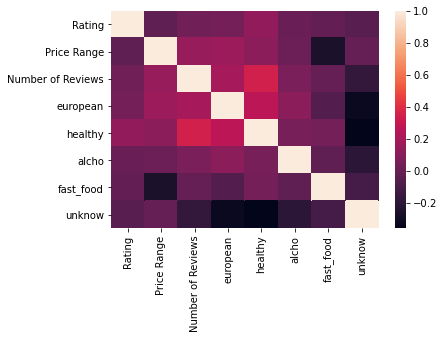

In [42]:
# Для наглядности
sns.heatmap(df.corr())

               Rating
Price Range          
1.000000     4.092331
1.913697     4.011392
2.005587     4.113187
2.035261     4.153780
2.068063     3.934728
2.071059     4.090608
2.081873     4.103641
2.102106     4.465946
2.107839     4.015187
2.108320     3.710463
2.112666     3.899135
2.134897     4.186207
2.138848     4.042442
2.164712     3.859669
2.184000     3.948240
2.190526     3.893333
2.213384     3.862808
2.242891     4.098958
2.271552     3.673160
2.295724     3.986816
2.298918     4.072985
2.314169     3.976969
2.314279     3.882017
2.326996     3.826371
2.335921     3.846275
2.336013     3.887713
2.352571     4.018859
2.372914     3.874016
2.399293     3.838725
2.479866     3.821429
2.495986     3.978916
2.500000     3.984412
2.561162     3.949438
4.000000     4.201830


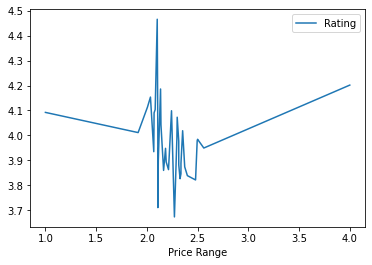

In [25]:
# Используем сводные таблицы и визуализации сводных таблиц для наглядного понимания взаимосвязи показателей
# Группировка со средней оценкой по ценовому критерию

print(df.pivot_table(index='Price Range', values='Rating', aggfunc= {'Rating': 'mean'}))
df.pivot_table(index='Price Range', values='Rating', aggfunc= {'Rating': 'mean'}).plot()

                     Rating
Number of Reviews          
2.0                3.995686
3.0                3.969749
4.0                4.113493
5.0                4.000594
6.0                3.981049
...                     ...
10706.0            3.500000
11497.0            4.000000
12910.0            4.000000
13862.0            4.000000
16478.0            4.000000

[2110 rows x 1 columns]


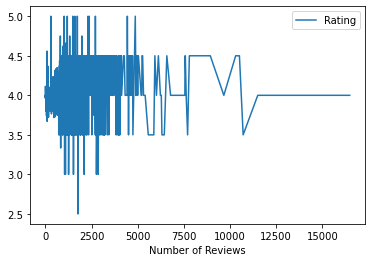

In [26]:
# Группировка со средней оценкой по числу отзывов

print(df.pivot_table(index='Number of Reviews', values='Rating', aggfunc= {'Rating': 'mean'}))
df.pivot_table(index='Number of Reviews', values='Rating', aggfunc= {'Rating': 'mean'}).plot()

In [27]:
# Группировка со средней оценкой по признаку european
print(df.pivot_table(index='european', values='Rating', aggfunc= {'Rating': 'mean'}))


            Rating
european          
0         3.969401
1         4.042397


In [28]:
# Группировка со средней оценкой по признаку healthy

print(df.pivot_table(index='healthy', values='Rating', aggfunc= {'Rating': 'mean'}))

           Rating
healthy          
0        3.925969
1        4.133684


In [29]:
# Группировка со средней оценкой по признаку alcho


print(df.pivot_table(index='alcho', values='Rating', aggfunc= {'Rating': 'mean'}))

         Rating
alcho          
0      3.984896
1      4.011305


In [30]:
# Группировка со средней оценкой по признаку fast_food

print(df.pivot_table(index='fast_food', values='Rating', aggfunc= {'Rating': 'mean'}))

             Rating
fast_food          
0          3.989347
1          3.958141


In [31]:
# Группировка со средней оценкой по признаку unknow

print(df.pivot_table(index='unknow', values='Rating', aggfunc= {'Rating': 'mean'}))

          Rating
unknow          
0       4.003735
1       3.935859


In [32]:
from scipy import stats as st

In [38]:
# Проверим гипотезу с помощью t - теста 
# Разобъем данные на две выборки
df_1 = df.loc[(df['Price Range'] < 2.5 )]
df_2 = df.loc[(df['Price Range'] >= 2.5)]
array_1 = df_1['Rating']
array_2 = df_2['Rating']


In [45]:
result = st.ttest_ind(array_1, array_2)
result
# Отвергаем нулевую гипотезу

Ttest_indResult(statistic=-5.866480609603495, pvalue=4.463496871091534e-09)